In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model


df = pd.read_csv('Aviation_KPIs_Dataset.xlsx - Sheet1.csv')
print(df.info())  # Check data types & missing values
print(df.describe())  # Summary statistics
df.head() # Display first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


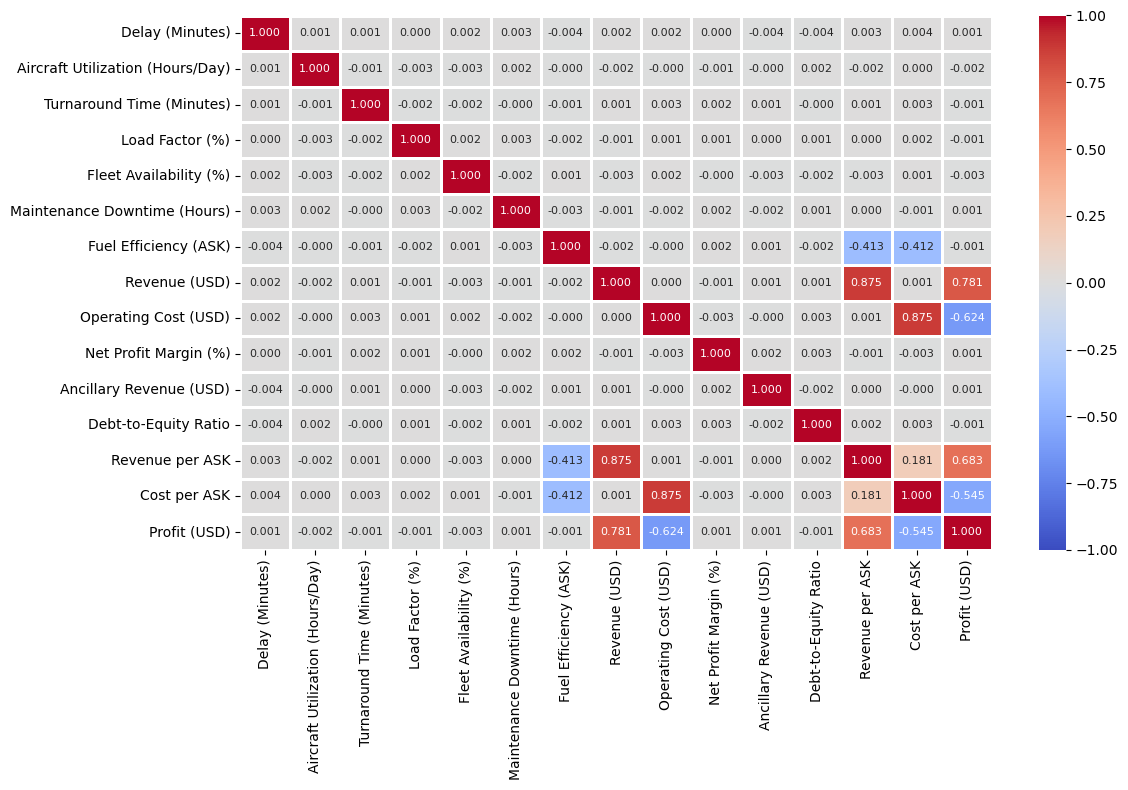

In [3]:
corrrelation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corrrelation_matrix,cmap="coolwarm", fmt=".3f", linewidths=1, annot_kws={"size": 8},annot= True, vmin=-1, vmax=1)
plt.tight_layout()
#plt.savefig('heatmap.png',dpi=200, bbox_inches='tight', format='png')
plt.show()
plt.close()

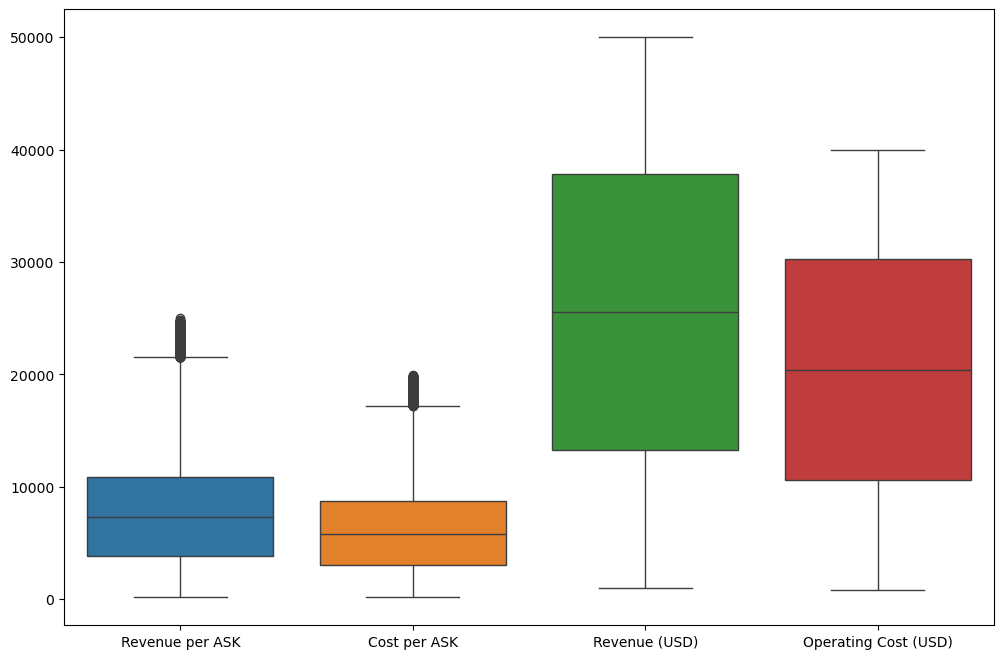

In [5]:
# Lets find if there are some outliers or not in corelated data
plt.figure(figsize=(12,8))
sns.boxplot(df[['Revenue per ASK','Cost per ASK','Revenue (USD)','Operating Cost (USD)']])
plt.savefig('boxplot.png',dpi=200, bbox_inches='tight', format='png')
plt.show()

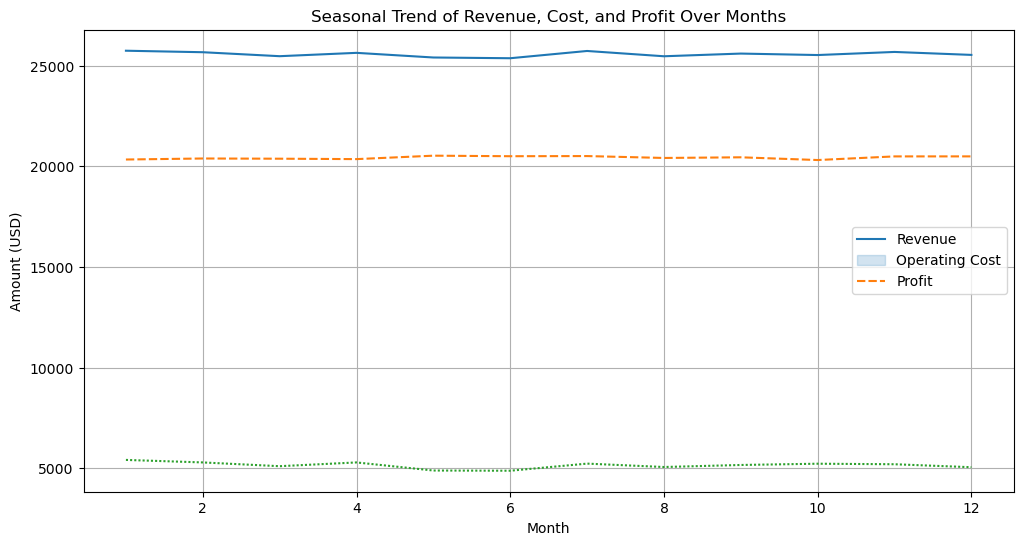

In [15]:
# Ensure datetime format
df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'])
df['Actual Departure Time'] = pd.to_datetime(df['Actual Departure Time'])

# Extract time-based features
df['Month'] = df['Scheduled Departure Time'].dt.month
df['DayOfWeek'] = df['Scheduled Departure Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Scheduled_Hour'] = df['Scheduled Departure Time'].dt.hour
df['Quarter'] = df['Scheduled Departure Time'].dt.quarter
df['Actual_Hour'] = df['Actual Departure Time'].dt.hour

# Group by month to check seasonality trends
monthly_trends = df.groupby('Month')[['Revenue (USD)', 'Operating Cost (USD)', 'Profit (USD)']].mean()

# Plot seasonal trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends)
plt.title("Seasonal Trend of Revenue, Cost, and Profit Over Months")
plt.xlabel("Month")
plt.ylabel("Amount (USD)")
plt.legend(["Revenue", "Operating Cost", "Profit"])
plt.grid()
plt.savefig('seasonaltrend.png',dpi=200, bbox_inches='tight', format='png')
plt.show()

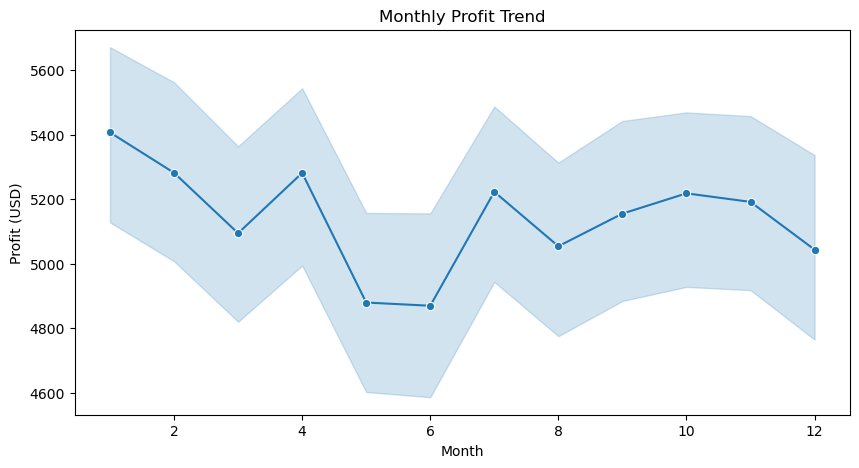

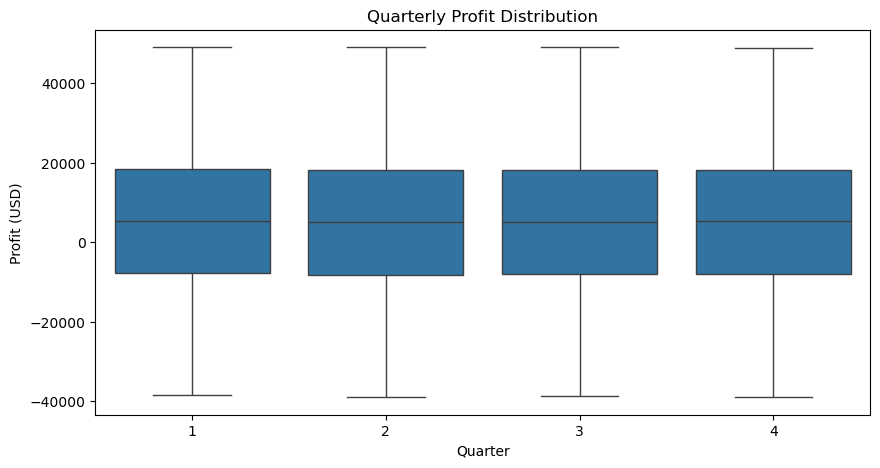

In [113]:
# Monthly Trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Profit (USD)', data=df, marker='o')
plt.title("Monthly Profit Trend")
plt.savefig('monthlyTrend.png',dpi=200, bbox_inches='tight', format='png')
plt.show()

# Quarterly Trend
plt.figure(figsize=(10, 5))
sns.boxplot(x='Quarter', y='Profit (USD)', data=df)
plt.title("Quarterly Profit Distribution")
plt.savefig('QuaterlyTrend.png',dpi=200, bbox_inches='tight', format='png')
plt.show()

In [121]:
df.head()
#df.isna().sum()
#df.describe()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),...,Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD),Month,DayOfWeek,Scheduled_Hour,Quarter,Actual_Hour
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,...,1058.68,2.46,2639.46,6710.26,-16893.84,5,0,11,2,2
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,...,2941.32,2.89,8040.01,398.07,30032.84,1,1,6,1,2
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,...,1920.45,1.34,3216.03,7158.42,-16794.61,5,3,9,2,1
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,...,3167.79,0.60,9664.17,3255.23,26468.92,8,3,5,3,13
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,...,619.80,0.84,2320.22,6975.65,-23137.50,7,3,15,3,15


In [129]:
# Assuming df is your DataFrame
df = df.copy()

### 🔹 Step 1: Extract Time-Based Features ###
df['Departure_Period'] = pd.cut(df['Scheduled_Hour'], 
                                bins=[0, 6, 12, 18, 24], 
                                labels=['Late Night', 'Morning', 'Afternoon', 'Night'], 
                                include_lowest=True)

df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0)

df['Delay_Bucket'] = pd.cut(df['Delay (Minutes)'], 
                            bins=[0, 30, 60, np.inf], 
                            labels=['Short', 'Moderate', 'Long'], 
                            include_lowest=True)

### 🔹 Step 2: Create Ratio & Interaction Features ###
df['Revenue_per_Flight_Hour'] = df['Revenue (USD)'] / df['Aircraft Utilization (Hours/Day)']
df['Profit_per_ASK'] = df['Profit (USD)'] / df['Fuel Efficiency (ASK)']
df['Fleet_Utilization_Efficiency'] = df['Aircraft Utilization (Hours/Day)'] / df['Fleet Availability (%)']

df['Delay_Revenue_Impact'] = df['Delay (Minutes)'] * df['Revenue (USD)']
df['LoadFactor_Revenue_Impact'] = df['Load Factor (%)'] * df['Revenue (USD)']

### 🔹 Step 3: Categorize Load Factor ###
df['LoadFactor_Bucket'] = pd.cut(df['Load Factor (%)'], 
                                 bins=[0, 60, 80, 100], 
                                 labels=['Low', 'Medium', 'High'], 
                                 include_lowest=True)

### 🔹 Step 4: Log Transform Skewed Features ###
for col in ['Revenue (USD)','Ancillary Revenue (USD)', 
            'Maintenance Downtime (Hours)', 'Cost per ASK']:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p handles zero values safely
df['log_Profit(USD)'] = np.sign(df['Profit (USD)']) * np.log1p(abs(df['Profit (USD)']))
### 🔹 Final Check ###
df.head()# Verify new features

Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
Month                               0
DayOfWeek                           0
Scheduled_Hour                      0
Quarter                             0
Actual_Hour                         0
Departure_Period                    0
Is_Weekend                          0
Delay_Bucket                        0
Revenue_per_

In [143]:
# one hot encoding for categorical columns 
#df = pd.get_dummies(df, columns=['Departure_Period','Delay_Bucket','LoadFactor_Bucket'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Flight Number                     200000 non-null  object        
 1   Scheduled Departure Time          200000 non-null  datetime64[ns]
 2   Actual Departure Time             200000 non-null  datetime64[ns]
 3   Delay (Minutes)                   200000 non-null  int64         
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64       
 5   Turnaround Time (Minutes)         200000 non-null  int64         
 6   Load Factor (%)                   200000 non-null  float64       
 7   Fleet Availability (%)            200000 non-null  float64       
 8   Maintenance Downtime (Hours)      200000 non-null  float64       
 9   Fuel Efficiency (ASK)             200000 non-null  float64       
 10  Revenue (USD)                   

In [296]:
# Now lets train baseline models before fine tuning of our hyper parameters and select first which model would be appropriate for us
X = df.drop(columns=['Flight Number','Scheduled Departure Time','Actual Departure Time',
    'Profit (USD)', 'log_Profit(USD)',  # Target & transformed target
    'Revenue (USD)', 'Operating Cost (USD)',  # Strong predictors of profit
    'Net Profit Margin (%)',  # Derived from profit
    'Profit_per_ASK',  # Directly related to profit
    'log_Revenue (USD)', 'log_Ancillary Revenue (USD)',  # Transformed revenue features
    'Revenue_per_Flight_Hour', 'Delay_Revenue_Impact', 'LoadFactor_Revenue_Impact','LoadFactor_Bucket_High','Quarter','log_Maintenance Downtime (Hours)',  # Revenue-dependent metrics
])

y = df['Profit (USD)']

In [274]:
#Split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Linear Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Linear Regression Performance:
R2 Score: 0.9391492243748212
MAE: 3336.887228635924
RMSE: 4454.520956261998


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [192]:
# Decision Tree Regressor model 
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, min_samples_split=50, min_samples_leaf=20,random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance:")
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))

Decision Tree Performance:
R2 Score: 0.9919183412373587
MAE: 1259.169340911258
RMSE: 1623.3725637016514


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [198]:
# Random Forest Regressor n
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest Performance:
R2 Score: 0.9969920615958471
MAE: 747.9074763323309
RMSE: 990.3812658404573


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [298]:
# XGBoost Gradient model
import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("XGBoost Performance:")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))

XGBoost Performance:
R2 Score: 0.999775224289146
MAE: 199.23749869628338
RMSE: 270.7338985839075


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [278]:
from sklearn.model_selection import cross_val_score

xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", scores.mean())

Cross-Validation R2 Scores: [0.99977186 0.99977344 0.99976599 0.99977329 0.99977589]
Mean R2 Score: 0.9997720970316764


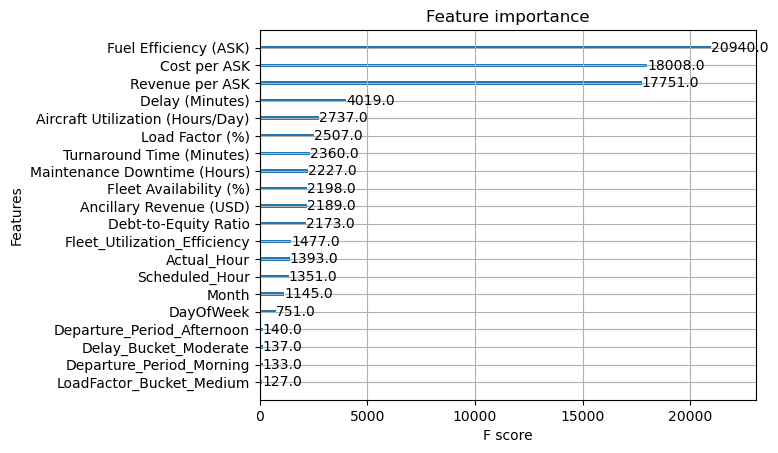

<Figure size 2000x800 with 0 Axes>

In [284]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb)
plt.figure(figsize=(20,8))
plt.savefig('featureimportance.png',dpi=200, bbox_inches='tight', format='png')
plt.tight_layout()
plt.show()

In [1]:
# Define the parameter grid
# We can also use grid search cv for better results
from sklearn.model_selection import RandomizedSearchCV 
param_grid = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.01, 0.1, 1, 10]
}

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,  # Number of different hyperparameter settings to try
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit on training data
random_search.fit(X, y)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"XGBoost Tuned Performance:\nR2 Score: {r2}\nMAE: {mae}\nRMSE: {rmse}")


KeyboardInterrupt

